**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
suppressMessages(suppressWarnings(library("coin")))
suppressMessages(suppressWarnings(library("pheatmap")))
suppressMessages(suppressWarnings(library("corrplot")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



## Import data

In [2]:
txt_fdiry = file.path(
    FD_RES, 
    "region_integration",
    "fcc_astarr_macs_input_overlap",
    "analysis_enrichment_v2",
    "fcc_starrmpracrispri_vote2_phenograph_neighbors070"
)
txt_fname = "region.prepare.group.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_region_group = dat
print(dim(dat))
fun_display_table(head(dat))

[1] 18341     5


Chrom,ChromStart,ChromEnd,Region,Group
chr1,100036895,100039189,chr1:100036895-100039189,Cluster00
chr1,100132375,100133491,chr1:100132375-100133491,Cluster00
chr1,100265562,100266994,chr1:100265562-100266994,Cluster00
chr1,10032429,10033763,chr1:10032429-10033763,Cluster13
chr1,100362769,100363401,chr1:100362769-100363401,Cluster00
chr1,100400445,100400762,chr1:100400445-100400762,Cluster01


In [3]:
txt_fdiry = file.path(
    FD_RES, 
    "region_integration",
    "fcc_astarr_macs_input_overlap",
    "analysis_enrichment_v2",
    "fcc_starrmpracrispri_vote2_phenograph_neighbors070"
)
txt_fname = "results.enrich.fcc_cluster_vs_others.perm_n10k.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_fit_summary_cluster_vs_others = dat
print(dim(dat))
fun_display_table(head(dat))

[1] 7815    6


Group,Feature,Stat,Pval,Score,Padj
Cluster00,H2AFZ,33.107126,0,1.6340344,0
Cluster00,H3K27ac,28.396013,0,1.3259570,0
Cluster00,H3K27me3,-10.903121,0,-1.2439611,0
Cluster00,H3K36me3,7.978978,0,-0.0091896,0
Cluster00,H3K4me1,-32.965805,0,-2.6867228,0
Cluster00,H3K4me2,48.054838,0,2.6115214,0


In [4]:
txt_fdiry = file.path(
    FD_RES, 
    "region_integration",
    "fcc_astarr_macs_input_overlap",
    "analysis_enrichment_v2",
    "fcc_starrmpracrispri_vote2_phenograph_neighbors070"
)
txt_fname = "results.enrich.fcc_cluster_vs_inactive.perm_n10k.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_fit_summary_cluster_vs_inactive = dat
print(dim(dat))
fun_display_table(head(dat))

[1] 7815    6


Group,Feature,Stat,Pval,Score,Padj
Cluster00,H2AFZ,31.892005,0,1.9227697,0
Cluster00,H3K27ac,35.280852,0,2.1939354,0
Cluster00,H3K27me3,-8.894941,0,-1.3408835,0
Cluster00,H3K36me3,5.036023,0,-0.2261681,0
Cluster00,H3K4me1,-26.686471,0,-2.7645101,0
Cluster00,H3K4me2,43.042401,0,2.8149920,0


In [5]:
dat = dat_fit_summary_cluster_vs_others
dat = dat %>% dplyr::mutate(nLog10Padj = -log10(Padj))

### summary
idx = is.infinite(dat$nLog10Padj)
vec = dat$nLog10Padj[!idx]
print(summary(vec))

### capped
idx = is.infinite(dat$nLog10Padj)
dat$nLog10Padj[idx] = 5

dat_fit_summary = dat

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000217 0.293697 0.786914 1.161845 1.827230 3.969799 


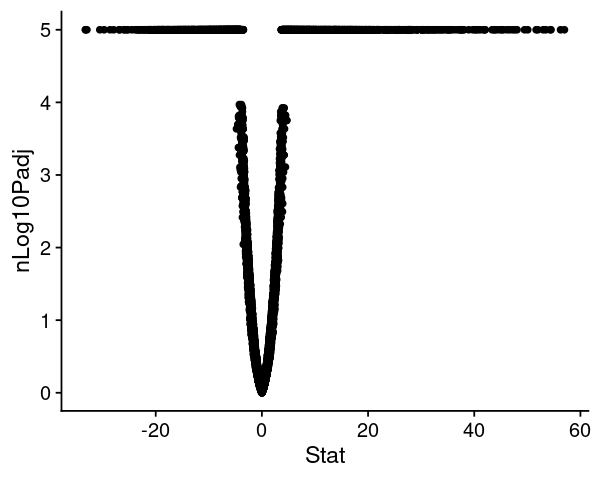

In [6]:
options(repr.plot.height = 4, repr.plot.width=5)
dat = dat_fit_summary
gpt = ggplot(dat, aes(x=Stat, y=nLog10Padj)) + geom_point() + theme_cowplot()

print(gpt)

In [7]:
dat = dat_fit_summary
print(dim(dat))
vec = unique(dat$Feature)
length(vec)

[1] 7815    7


[1] 521

In [8]:
dat = dat_fit_summary
dat = dat %>% dplyr::filter(Padj == 0)
print(dim(dat))
vec = unique(dat$Feature)
length(vec)

[1] 4046    7


[1] 521

In [9]:
dat = dat_fit_summary
dat = dat %>% 
    dplyr::group_by(Group) %>%
    dplyr::slice_max(Stat, n = 10)

dat_fit_summary_upper = dat
print(dim(dat))
head(dat)

[1] 150   7


Group,Feature,Stat,Pval,Score,Padj,nLog10Padj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cluster00,H3K4me3,54.45405,0,3.029990,0,5
Cluster00,PHF8,52.97634,0,2.933357,0,5
Cluster00,H3K9ac,50.07075,0,2.743350,0,5
Cluster00,H3K4me2,48.05484,0,2.611521,0,5
Cluster00,RBFOX2,47.22093,0,2.556989,0,5
Cluster00,SUPT5H,46.12854,0,2.485553,0,5


In [10]:
dat = dat_fit_summary
dat = dat %>% 
    dplyr::group_by(Group) %>%
    dplyr::slice_min(Stat, n = 10)

dat_fit_summary_lower = dat
print(dim(dat))
head(dat)

[1] 150   7


Group,Feature,Stat,Pval,Score,Padj,nLog10Padj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cluster00,CBFA2T2,-33.23932,0,-2.704609,0,5
Cluster00,PBX2,-33.21182,0,-2.702811,0,5
Cluster00,H3K4me1,-32.96581,0,-2.686723,0,5
Cluster00,CBFA2T3,-30.52986,0,-2.527427,0,5
Cluster00,PKNOX1,-29.71659,0,-2.474244,0,5
Cluster00,ARID1B,-27.91430,0,-2.356386,0,5


In [11]:
dat = dat_fit_summary_upper
vec = dat$Feature
vec = unique(vec)
print(length(vec))

dat = dat_fit_summary_lower
vec = dat$Feature
vec = unique(vec)
print(length(vec))

[1] 131
[1] 109


In [12]:
dat = bind_rows(dat_fit_summary_upper, dat_fit_summary_lower)
vec = dat$Feature
vec = unique(vec)

dat_fit_summary_subset = dat
vec_txt_feature_subset = vec
print(length(vec))

[1] 185


In [13]:
dat = dat_fit_summary

###
dat = dat %>% 
    dplyr::select(Group, Feature, Score) %>%
    tidyr::spread(Feature, Score) %>%
    column_to_rownames("Group")
mat_fit_summary = dat
print(dim(dat))

###
vec = vec_txt_feature_subset
dat = dat[,vec]
mat_fit_summary_subset = dat
print(dim(dat))

head(dat)

[1]  15 521
[1]  15 185


,H3K4me3,PHF8,H3K9ac,H3K4me2,RBFOX2,SUPT5H,SMAD5,POLR2A,KDM5B,POLR2G,⋯,EP400,ARID3A,TBL1XR1,RCOR1,EP300,ZMIZ1,CUX1,ZC3H11A,HDAC8,MEIS2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cluster00,3.0299902,2.9333571,2.743349794,2.61152142,2.55698910,2.4855533,2.4426846,2.3667996,2.3355777,2.3322072,⋯,1.6637955,-1.47081009,-0.7221879,-1.6114960,-1.8362843,-0.3599428,-1.2715517,0.1703182,-0.09548378,-1.08961089
Cluster01,-2.0717122,-1.6809257,-0.179841510,0.03994959,-1.20120981,-0.8867223,-1.2826319,-0.6244616,-0.7392144,-1.7386545,⋯,-0.8292893,0.52838299,0.3151609,0.8935844,0.9924317,-0.1727231,1.4243826,0.3628410,1.74410679,-0.42115344
Cluster02,-1.8509545,-2.0344680,-1.534251629,-0.99161752,-1.86219302,-1.7773727,-1.7105466,-0.8808174,-1.2760367,-1.9714682,⋯,-1.3629295,0.90327301,1.6873135,2.0423585,2.6047389,1.7873170,0.7617632,-0.2471454,-0.52773985,1.23042548
Cluster03,-0.5089299,-0.6617926,-0.603839600,1.27429146,-2.58009032,-0.7736505,-1.1098988,-1.5509986,-0.3671054,-2.7074372,⋯,-1.1043734,-0.45078138,-1.0969142,-0.2187702,-1.6123260,-1.3777476,-0.2753220,0.5488064,0.31423699,0.55185252
Cluster04,-0.8538343,-0.4154459,-0.237914939,-1.10873658,-1.01466427,-0.6708881,0.4176082,-1.2140372,0.1783112,-0.9996843,⋯,-1.2999438,-0.81507224,-0.8635164,-1.2788524,-1.6678682,-0.5198801,-0.7702249,-0.3414020,-0.12420803,-0.09686211
Cluster05,1.8010506,0.1461662,0.004917698,3.05728595,0.09180767,-1.5259260,-1.9104602,-0.7791931,-0.3733417,0.7823979,⋯,-1.7061125,0.04977018,-0.3424235,0.7048244,-0.6187030,-0.6019676,0.3385798,0.5628716,-0.44141405,-0.53251233


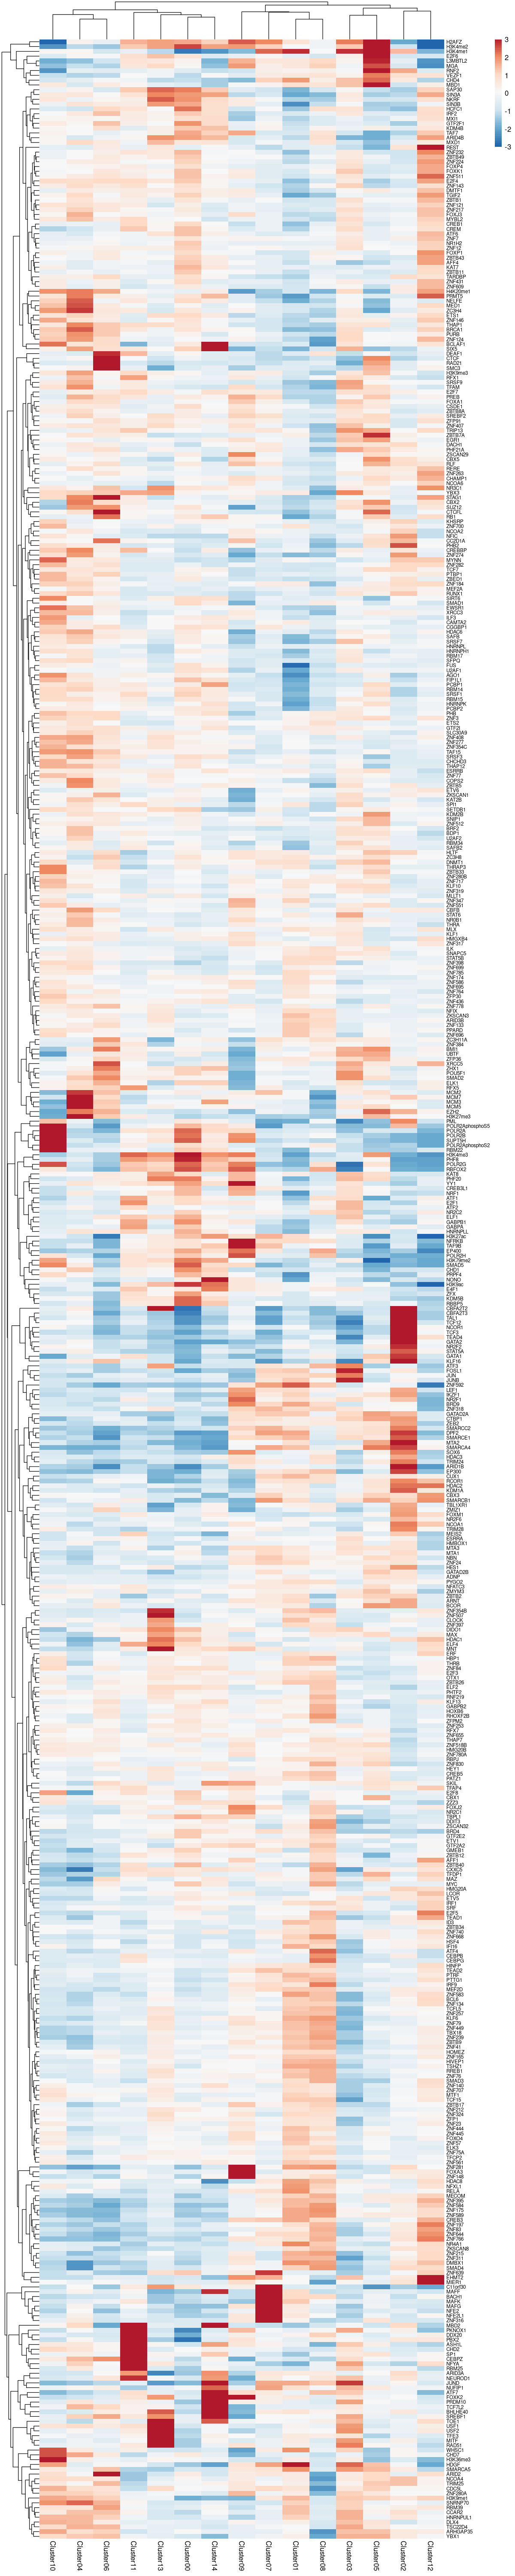

In [14]:
vec_num_breaks = seq(-3, 3, by = 0.1)

vec = brewer.pal(n = 7, name = "RdBu")
vec = colorRampPalette(rev(vec))(length(vec_num_breaks))
vec_txt_colors = vec

options(repr.plot.height = 50, repr.plot.width=10)
dat = mat_fit_summary
dat = t(dat)

plt = pheatmap(
    dat,
    color  = vec_txt_colors,
    breaks = vec_num_breaks,
    cluster_rows = TRUE,
    cluster_cols = TRUE,
    fontsize = 10,
    fontsize_row = 7
)

In [15]:
save_pheatmap_pdf <- function(x, filename, width=7, height=7) {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   pdf(filename, width=width, height=height)
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()
}
save_pheatmap_pdf(plt, "test.pdf", width=15, height=50)

pdf 
  2

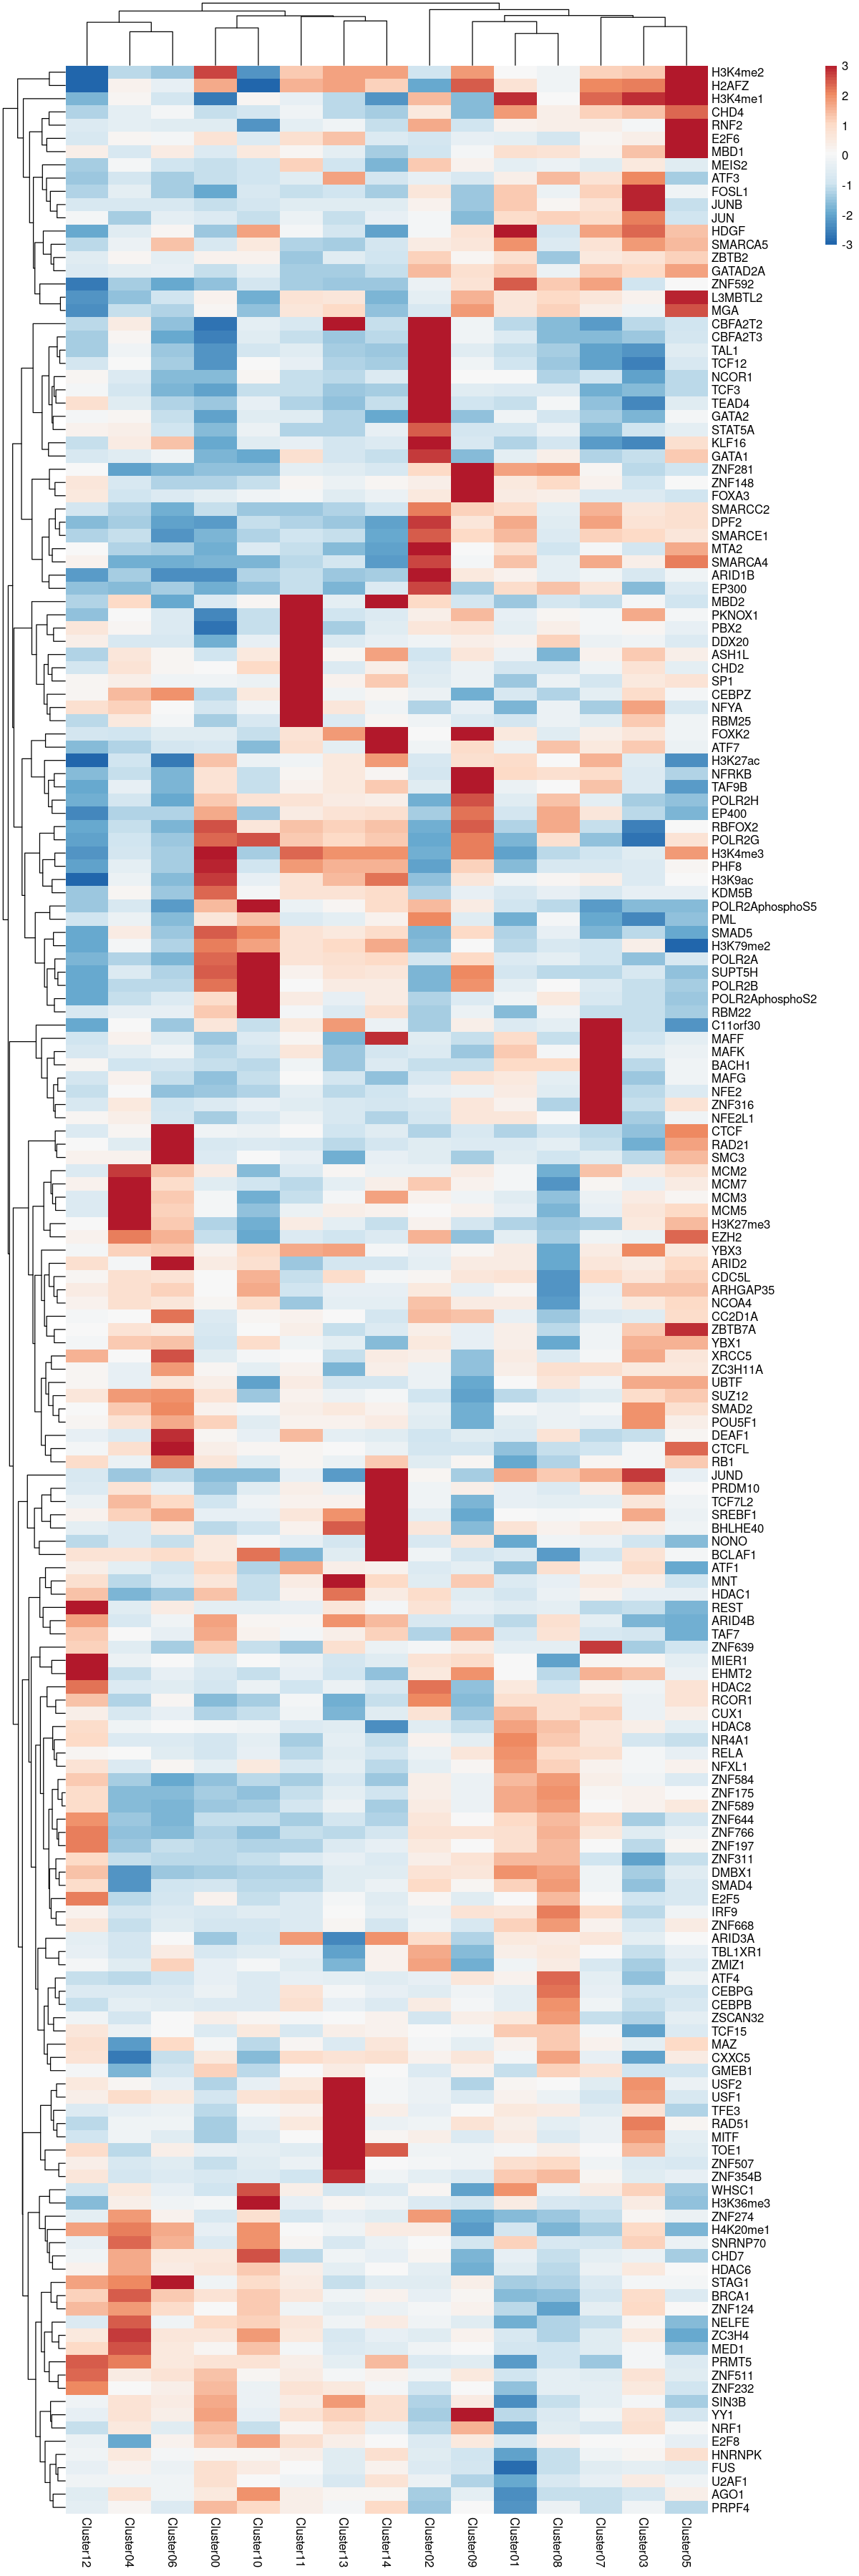

In [16]:
vec_num_breaks = seq(-3, 3, by = 0.1)

vec = brewer.pal(n = 7, name = "RdBu")
vec = colorRampPalette(rev(vec))(length(vec_num_breaks))
vec_txt_colors = vec

options(repr.plot.height = 30, repr.plot.width=10)
dat = mat_fit_summary_subset
dat = t(dat)
pheatmap(
    dat,
    color  = vec_txt_colors,
    breaks = vec_num_breaks,
    cluster_rows = TRUE,
    cluster_cols = TRUE
)

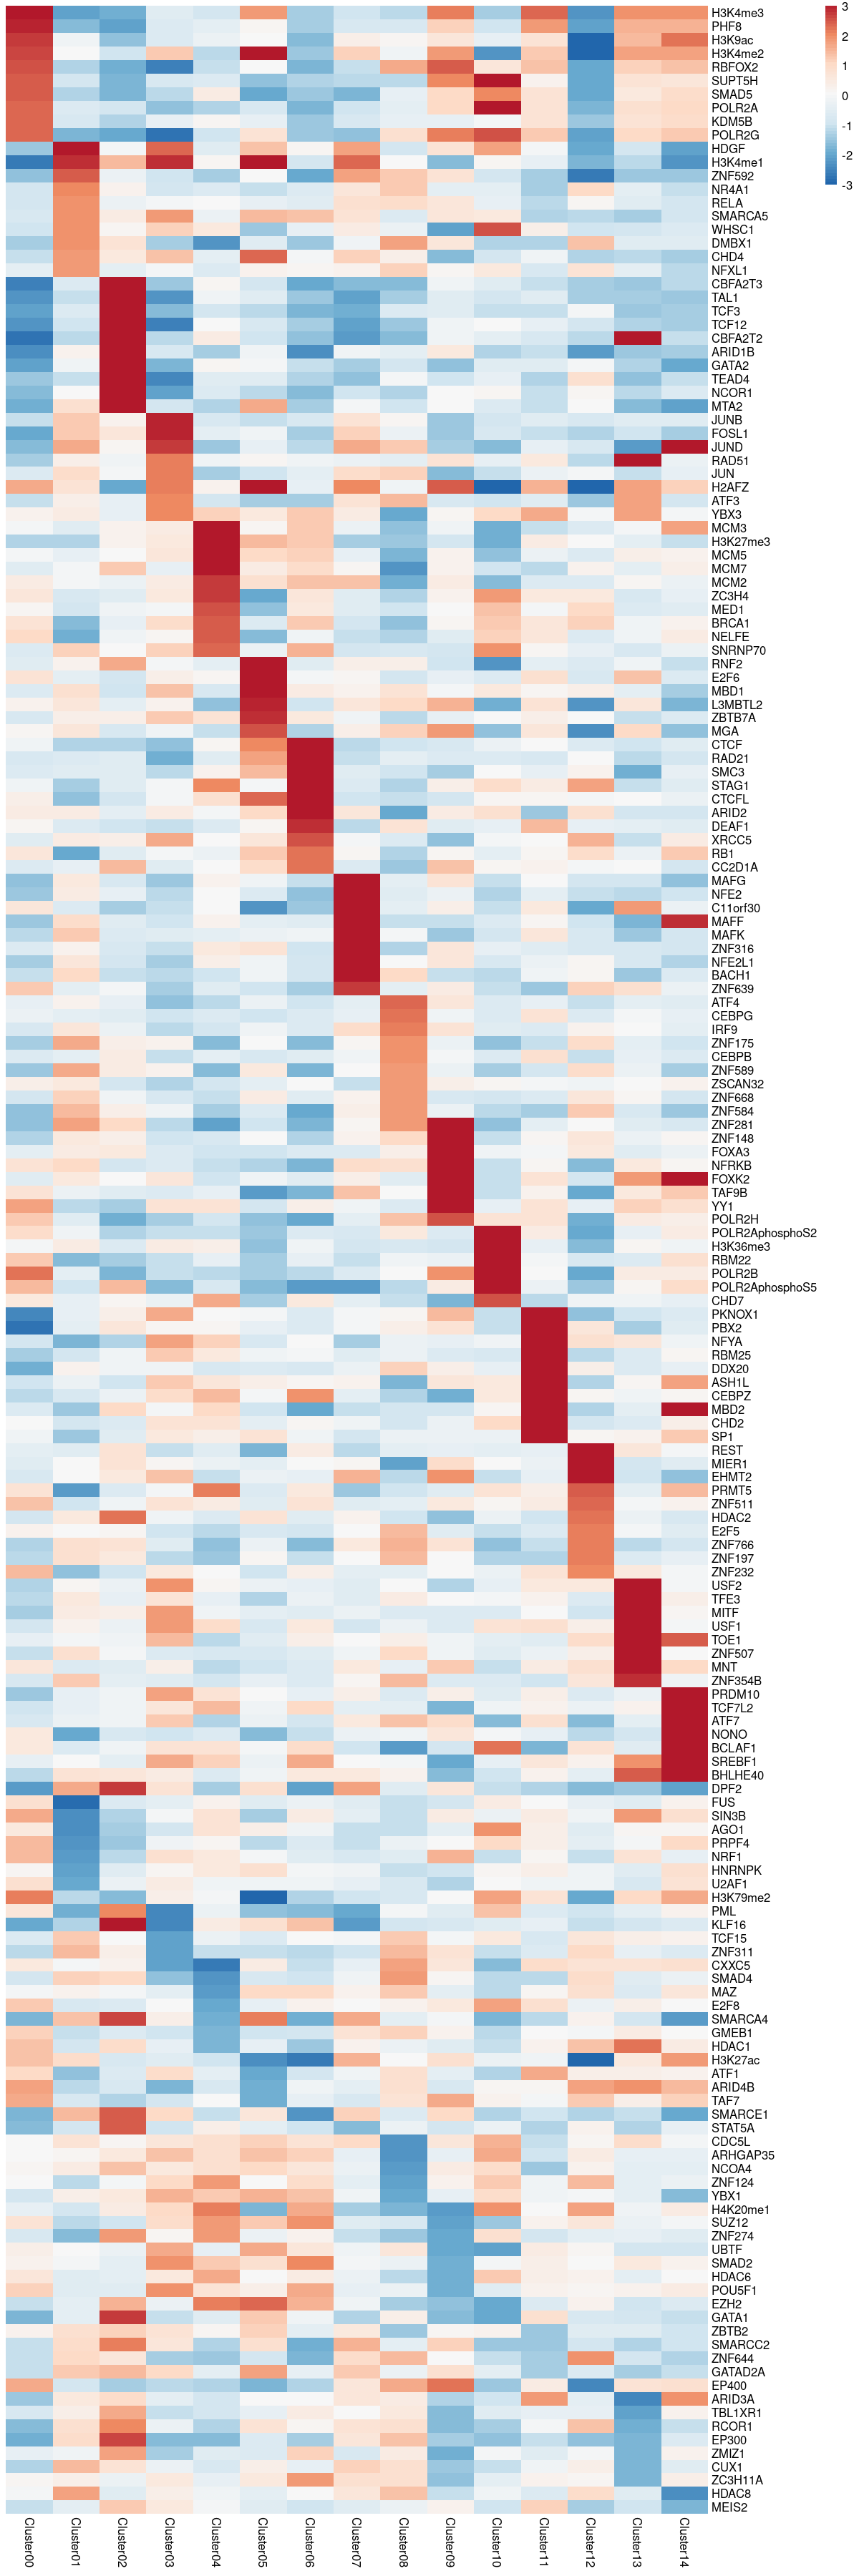

In [17]:
vec_num_breaks = seq(-3, 3, by = 0.1)

vec = brewer.pal(n = 7, name = "RdBu")
vec = colorRampPalette(rev(vec))(length(vec_num_breaks))
vec_txt_colors = vec

options(repr.plot.height = 30, repr.plot.width=10)
dat = mat_fit_summary_subset
dat = t(dat)
pheatmap(
    dat,
    color  = vec_txt_colors,
    breaks = vec_num_breaks,
    cluster_rows = FALSE,
    cluster_cols = FALSE
)

## Plot Lower

In [18]:
brewer.pal(n=8, name = "Blues")

[1] "#F7FBFF" "#DEEBF7" "#C6DBEF" "#9ECAE1" "#6BAED6" "#4292C6" "#2171B5"
[8] "#084594"

In [19]:
dat = dat_fit_summary_lower
summary(dat$Score)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -3.507  -2.247  -2.032  -2.082  -1.847  -1.336 

In [20]:
vec_num_breaks = seq(-3.0, -1.0, by = 0.1)
vec_num_values = scales::rescale(vec_num_breaks, to = c(0, 1))

#vec = c("#c6dbef", "#9ecae1", "#6baed6", )
vec = brewer.pal(n=9, name = "Blues")
vec = colorRampPalette(rev(vec))(length(vec_num_breaks))
vec_txt_colors = vec

print(vec_num_breaks)
print(vec_txt_colors)

 [1] -3.0 -2.9 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3 -2.2 -2.1 -2.0 -1.9 -1.8 -1.7 -1.6
[16] -1.5 -1.4 -1.3 -1.2 -1.1 -1.0
 [1] "#08306B" "#083D7E" "#084A92" "#0D57A1" "#1764AB" "#2171B5" "#2E7EBB"
 [8] "#3B8BC2" "#4A97C9" "#5AA2CF" "#6BAED6" "#7FB9DA" "#93C4DE" "#A6CDE3"
[15] "#B6D4E9" "#C6DBEF" "#CFE1F2" "#D9E7F5" "#E3EEF8" "#EDF4FB" "#F7FBFF"


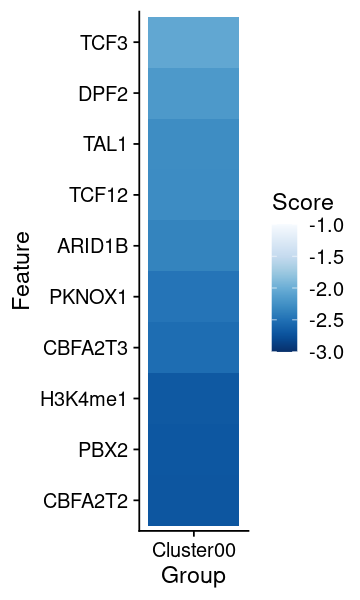

In [21]:
dat = dat_fit_summary_lower
dat = dat %>% dplyr::filter(Group == "Cluster00")

###
dat = dat %>% 
    dplyr::arrange(Score) %>% 
    dplyr::mutate(Feature = factor(Feature, levels=Feature))

###
gpt = ggplot(dat, aes(x=Group, y=Feature, fill=Score)) +
    geom_tile() +
    theme_cowplot() +
    scale_fill_gradientn(
        colours = vec_txt_colors,
        values  = vec_num_values, # Rescaled between 0 and 1
        limits  = c(-3.0, -1.0),  # Explicit limits
        oob     = scales::squish, # Clamp out-of-range values to closest limit color
        name    = "Score"
    )
options(repr.plot.height=5, repr.plot.width=3)
print(gpt)

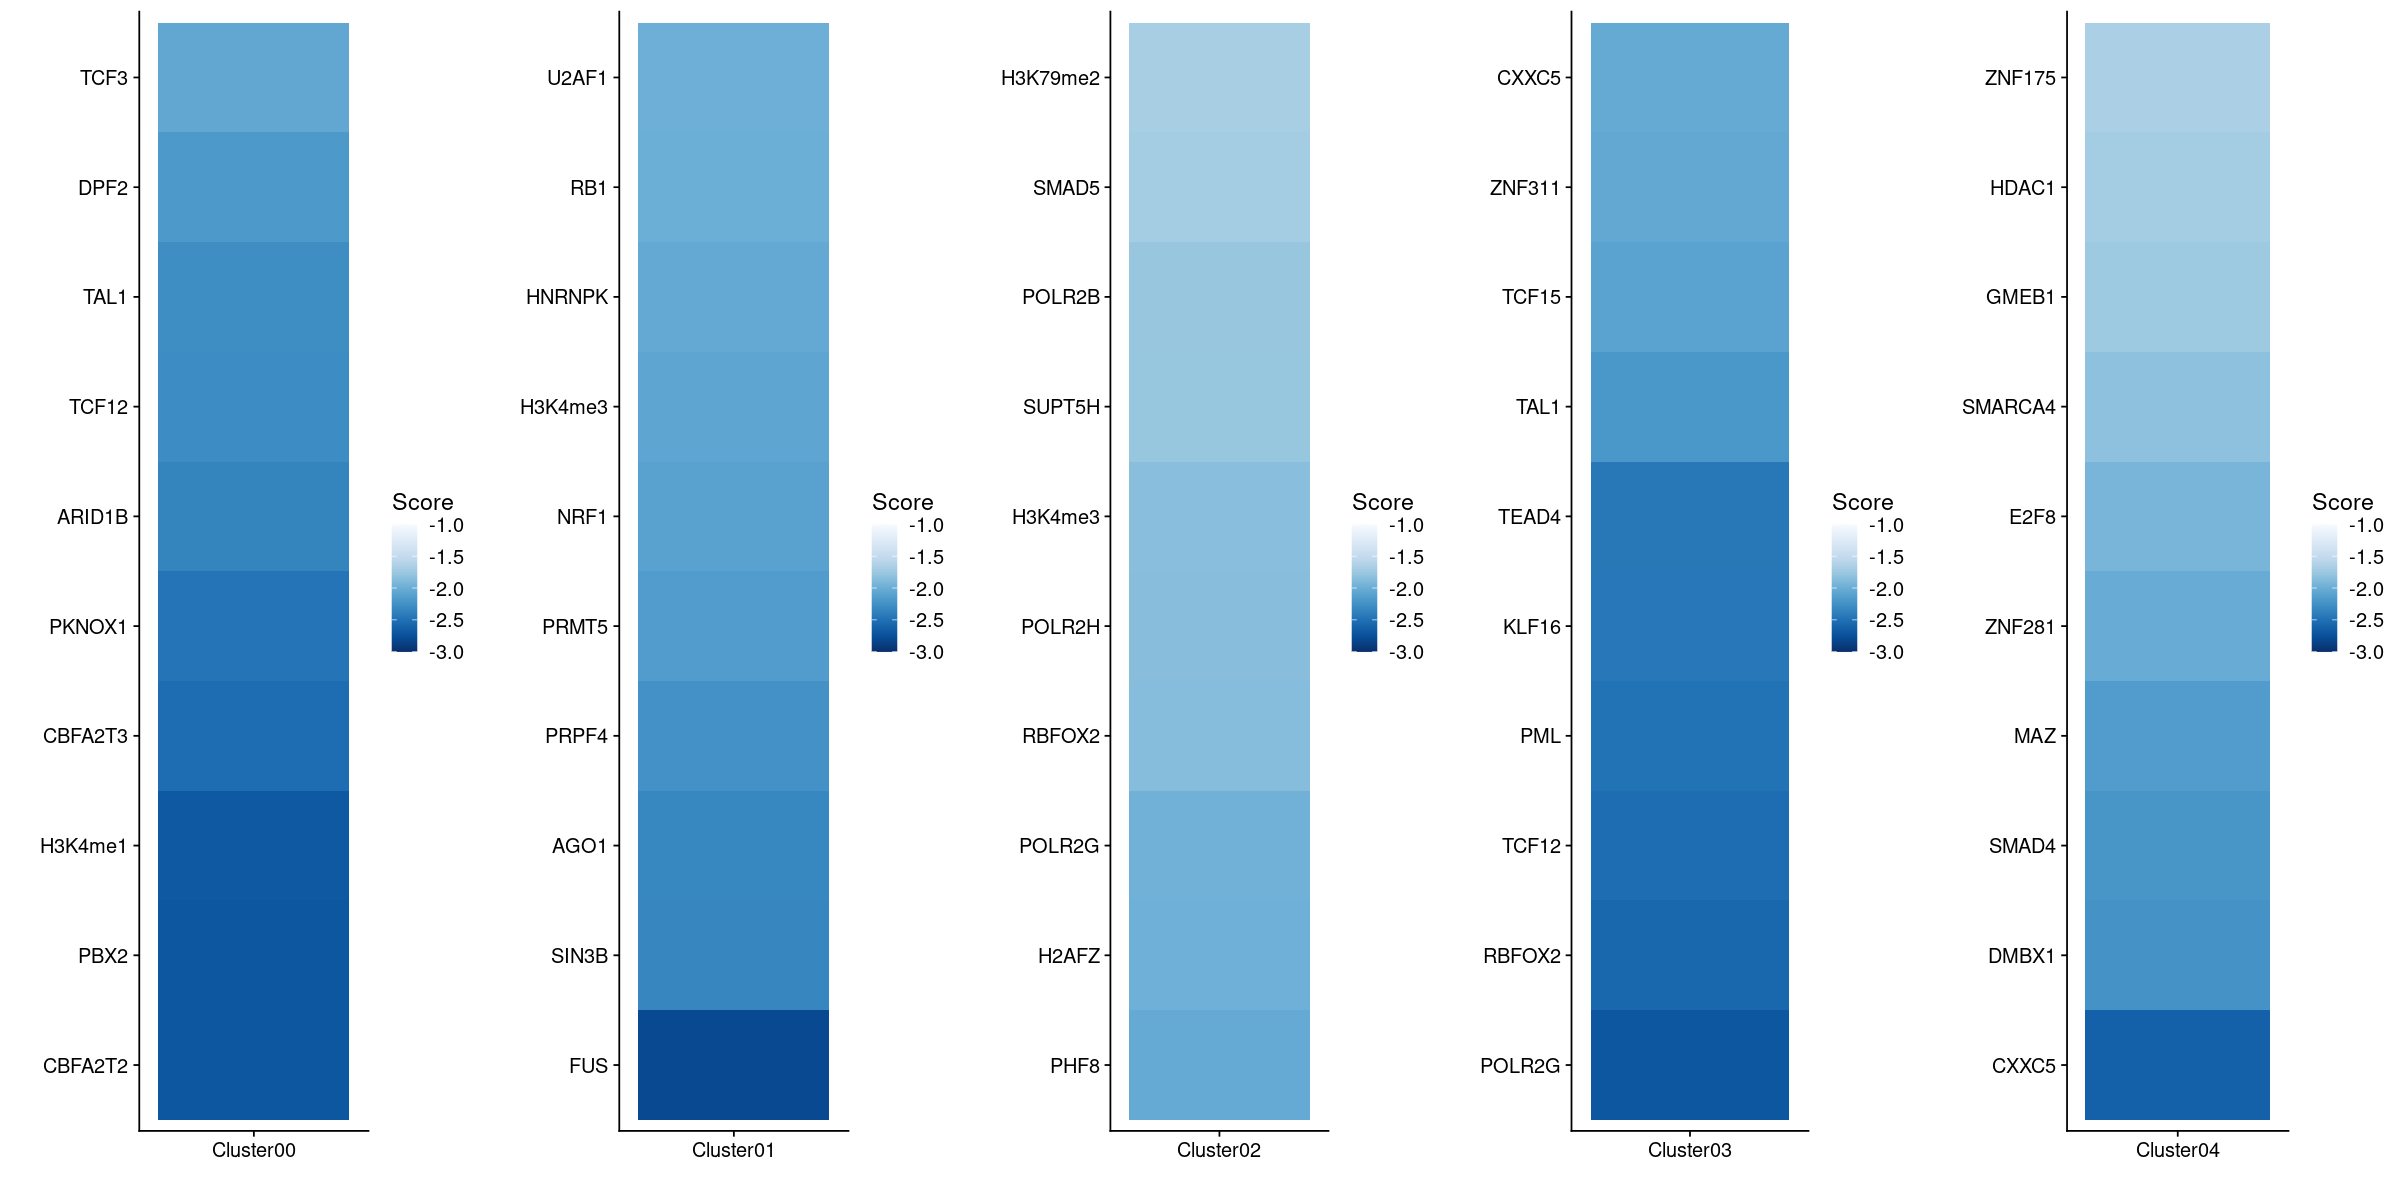

In [22]:
dat = dat_fit_summary_lower
lst = split(dat, dat$Group)
lst = lapply(lst[1:5], function(dat){
    ###
    dat = dat %>% 
        dplyr::arrange(Score) %>% 
        dplyr::mutate(Feature = factor(Feature, levels=Feature))

    ###
    gpt = ggplot(dat, aes(x=Group, y=Feature, fill=Score)) +
        geom_tile() +
        theme_cowplot() +
        labs(x="", y="") +
        scale_fill_gradientn(
            colours = vec_txt_colors,
            values  = vec_num_values, # Rescaled between 0 and 1
            limits  = c(-3.0, -1.0),  # Explicit limits
            oob     = scales::squish, # Clamp out-of-range values to closest limit color
            name    = "Score"
        )
    return(gpt)
})

options(repr.plot.height=10, repr.plot.width=20)
plot_grid(plotlist = lst, nrow=1)

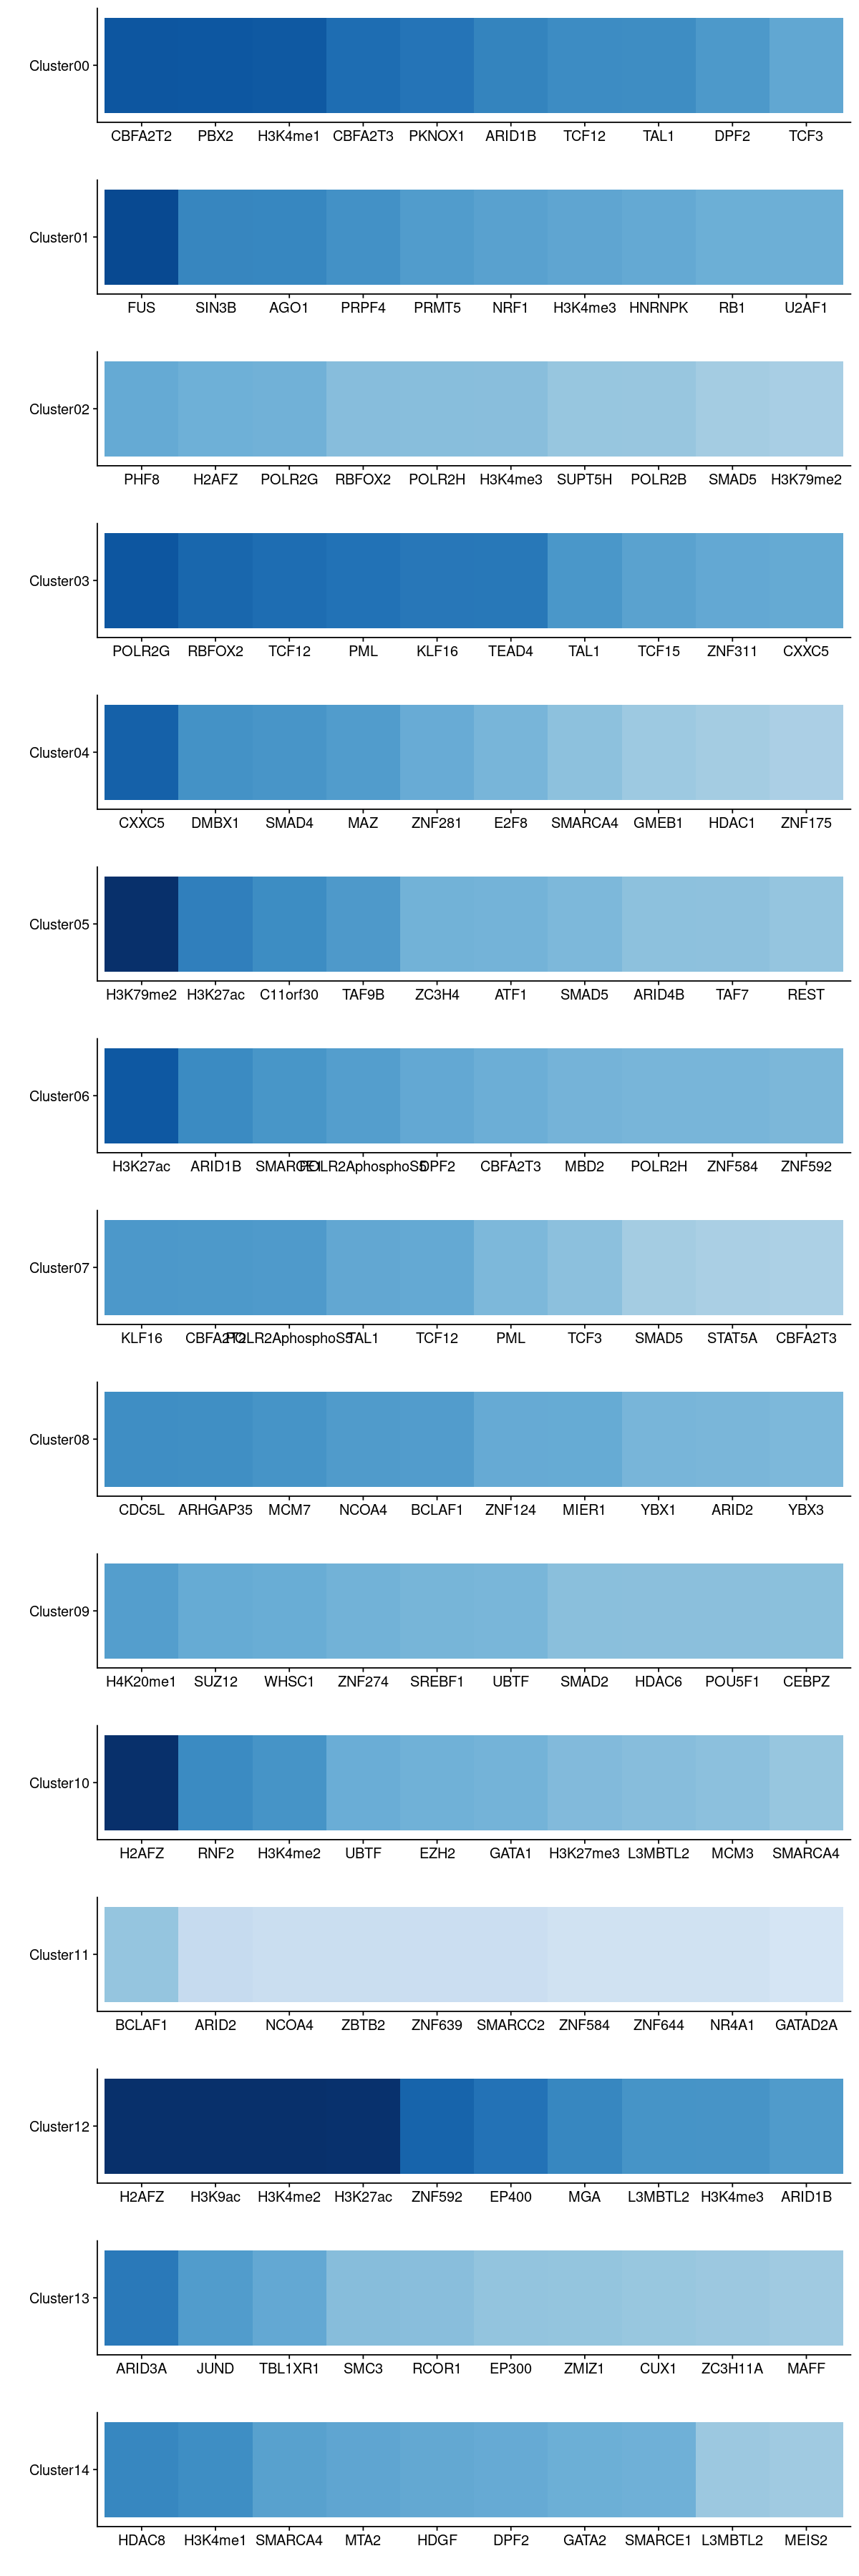

In [23]:
dat = dat_fit_summary_lower
lst = split(dat, dat$Group)
lst = lapply(lst, function(dat){
    ###
    dat = dat %>% 
        dplyr::arrange(Score) %>% 
        dplyr::mutate(Feature = factor(Feature, levels=Feature))

    ###
    gpt = ggplot(dat, aes(x=Feature, y=Group, fill=Score)) +
        geom_tile() +
        theme_cowplot() +
        labs(x="", y="") +
        scale_fill_gradientn(
            colours = vec_txt_colors,
            values  = vec_num_values, # Rescaled between 0 and 1
            limits  = c(-3.0, -1.0),  # Explicit limits
            oob     = scales::squish, # Clamp out-of-range values to closest limit color
            name    = "Score"
        )
    return(gpt)
})

lst = lapply(lst, function(gpt){
    gpt = gpt + theme(legend.position="none")
})

options(repr.plot.height=30, repr.plot.width=10)
plot_grid(plotlist = lst, ncol=1)

## Plot upper

In [35]:
dat = dat_fit_summary_upper
summary(dat$Score)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.821   2.419   3.109   3.400   3.990   7.025 

In [36]:
vec_num_breaks = seq(1.5, 4.0, by = 0.1)
vec_num_values = scales::rescale(vec_num_breaks, to = c(0, 1))


vec = brewer.pal(n=9, name = "Reds")
vec = colorRampPalette(vec)(length(vec_num_breaks))
vec_txt_colors = vec

print(vec_num_breaks)
print(vec_txt_colors)

 [1] 1.5 1.6 1.7 1.8 1.9 2.0 2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.0 3.1 3.2 3.3
[20] 3.4 3.5 3.6 3.7 3.8 3.9 4.0
 [1] "#FFF5F0" "#FEEEE6" "#FEE7DC" "#FEE0D3" "#FDD5C4" "#FCC9B4" "#FCBDA4"
 [8] "#FCB195" "#FCA486" "#FC9677" "#FB8A69" "#FB7D5D" "#FB7050" "#F96245"
[15] "#F5533B" "#F14432" "#EA362A" "#DF2B25" "#D32020" "#C7171C" "#BB1419"
[22] "#AF1117" "#A20E14" "#8E0912" "#7A040F" "#67000D"


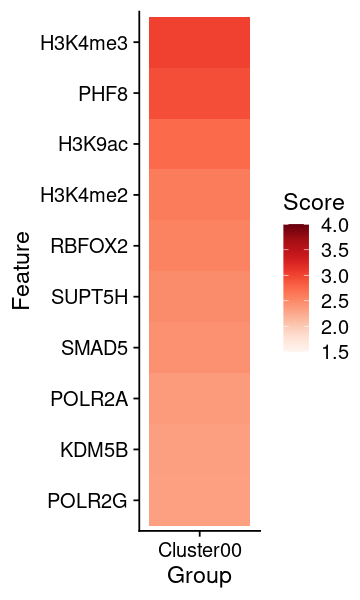

In [38]:
dat = dat_fit_summary_upper
dat = dat %>% dplyr::filter(Group == "Cluster00")

###
dat = dat %>% 
    dplyr::arrange(Score) %>% 
    dplyr::mutate(Feature = factor(Feature, levels=Feature))

###
gpt = ggplot(dat, aes(x=Group, y=Feature, fill=Score)) +
    geom_tile() +
    theme_cowplot() +
    scale_fill_gradientn(
        colours = vec_txt_colors,
        values  = vec_num_values, # Rescaled between 0 and 1
        limits  = c(1.5, 4),  # Explicit limits
        oob     = scales::squish, # Clamp out-of-range values to closest limit color
        name    = "Score"
    )
options(repr.plot.height=5, repr.plot.width=3)
print(gpt)

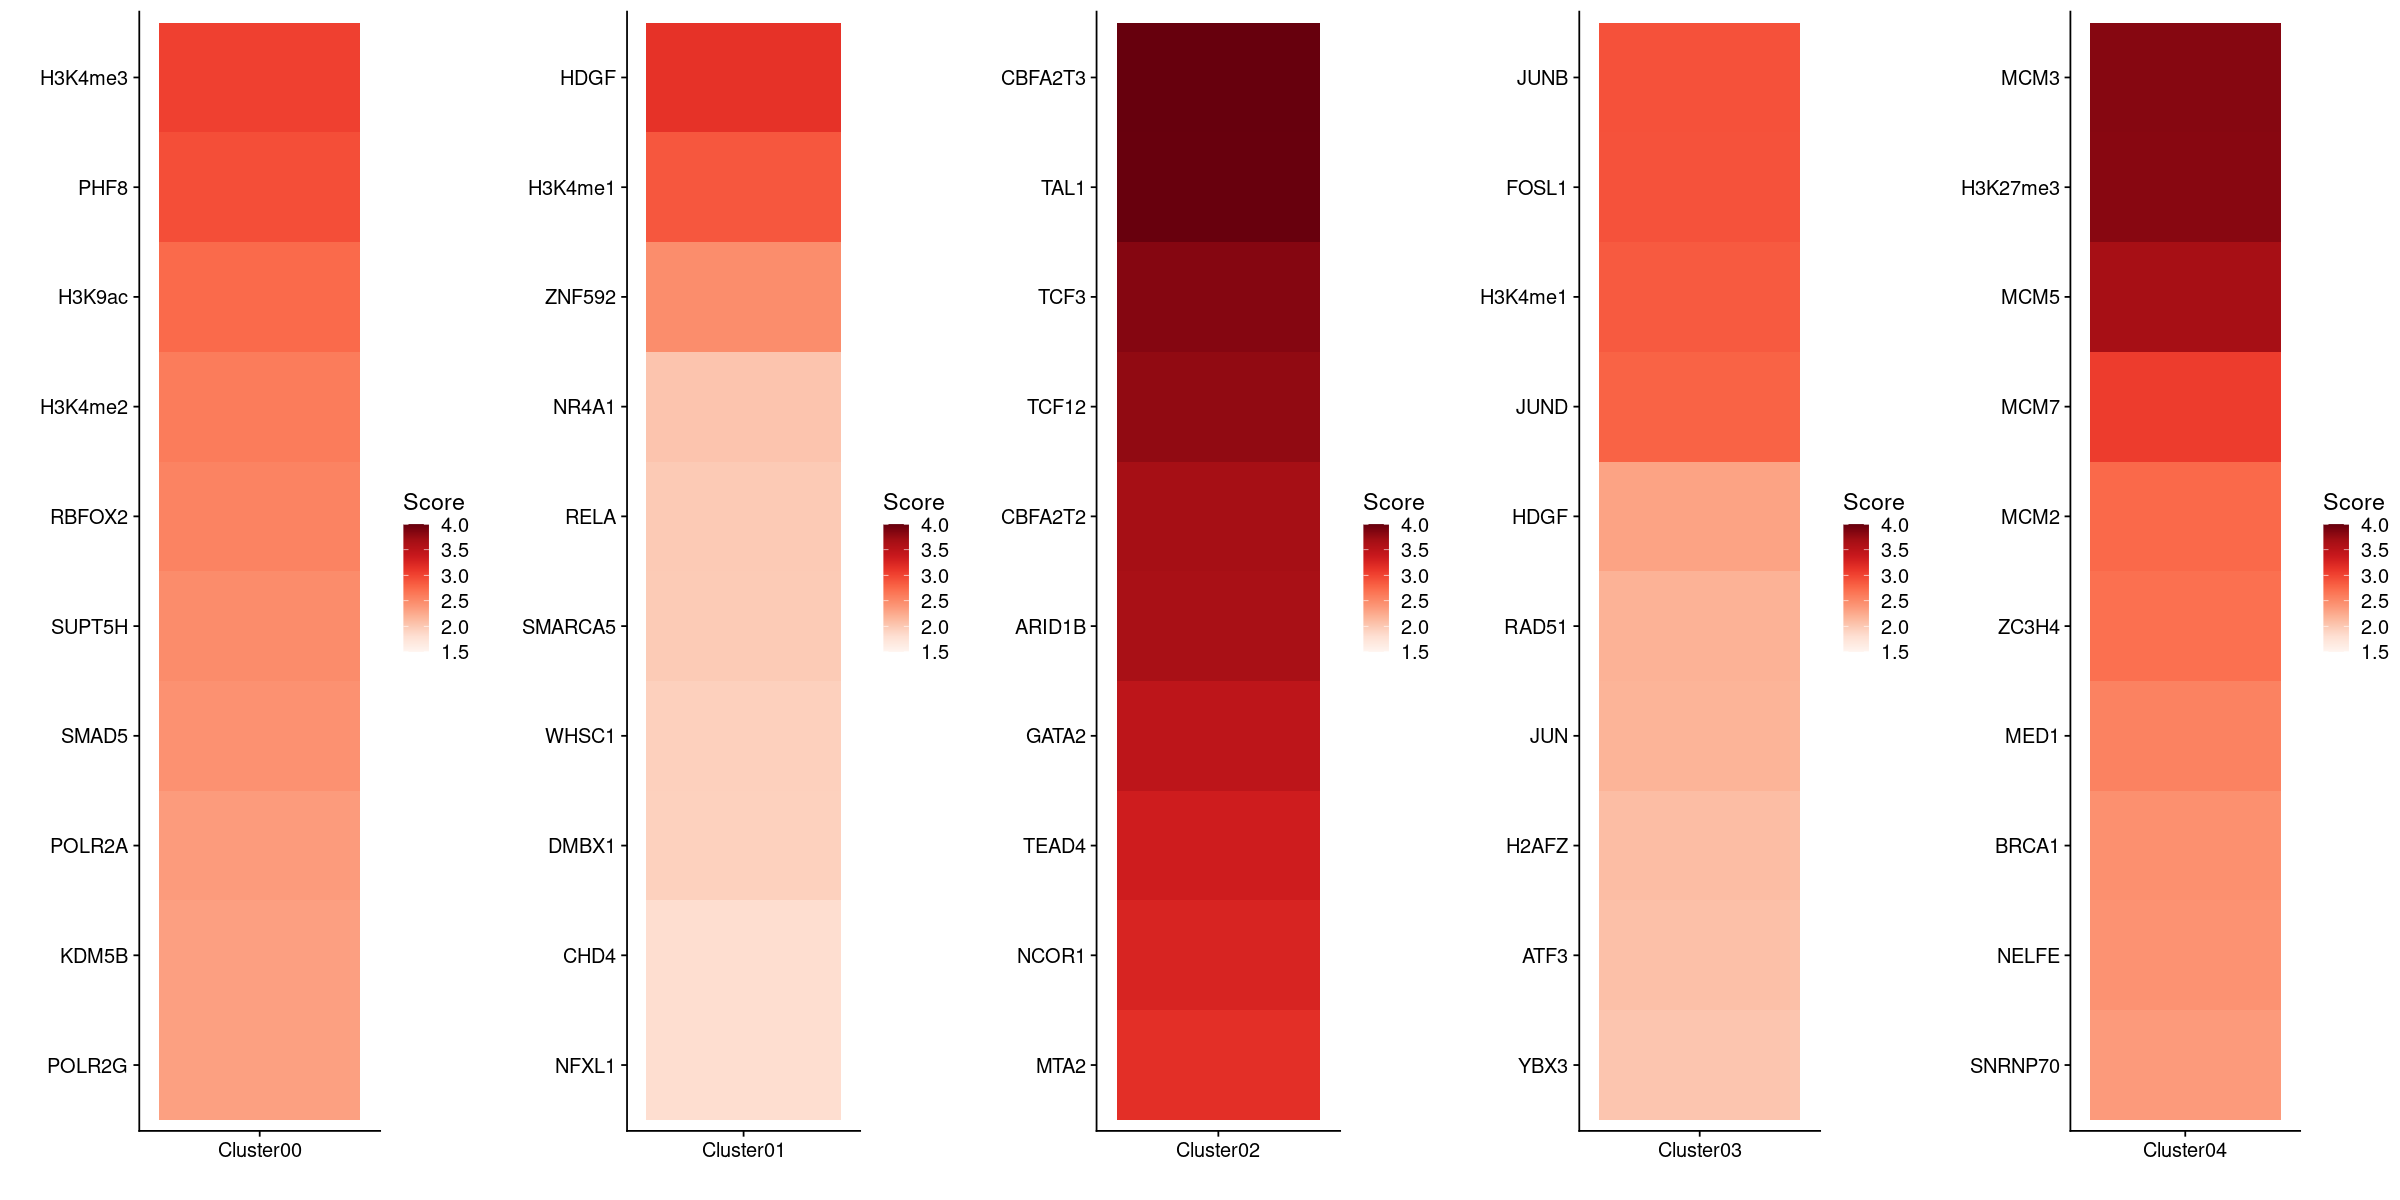

In [26]:
dat = dat_fit_summary_upper
lst = split(dat, dat$Group)
lst = lapply(lst[1:5], function(dat){
    ###
    dat = dat %>% 
        dplyr::arrange(Score) %>% 
        dplyr::mutate(Feature = factor(Feature, levels=Feature))

    ###
    gpt = ggplot(dat, aes(x=Group, y=Feature, fill=Score)) +
        geom_tile() +
        theme_cowplot() +
        labs(x="", y="") +
        scale_fill_gradientn(
            colours = vec_txt_colors,
            values  = vec_num_values, # Rescaled between 0 and 1
            limits  = c(1.5, 4),  # Explicit limits
            oob     = scales::squish, # Clamp out-of-range values to closest limit color
            name    = "Score"
        )
    return(gpt)
})

options(repr.plot.height=10, repr.plot.width=20)
plot_grid(plotlist = lst, nrow=1)

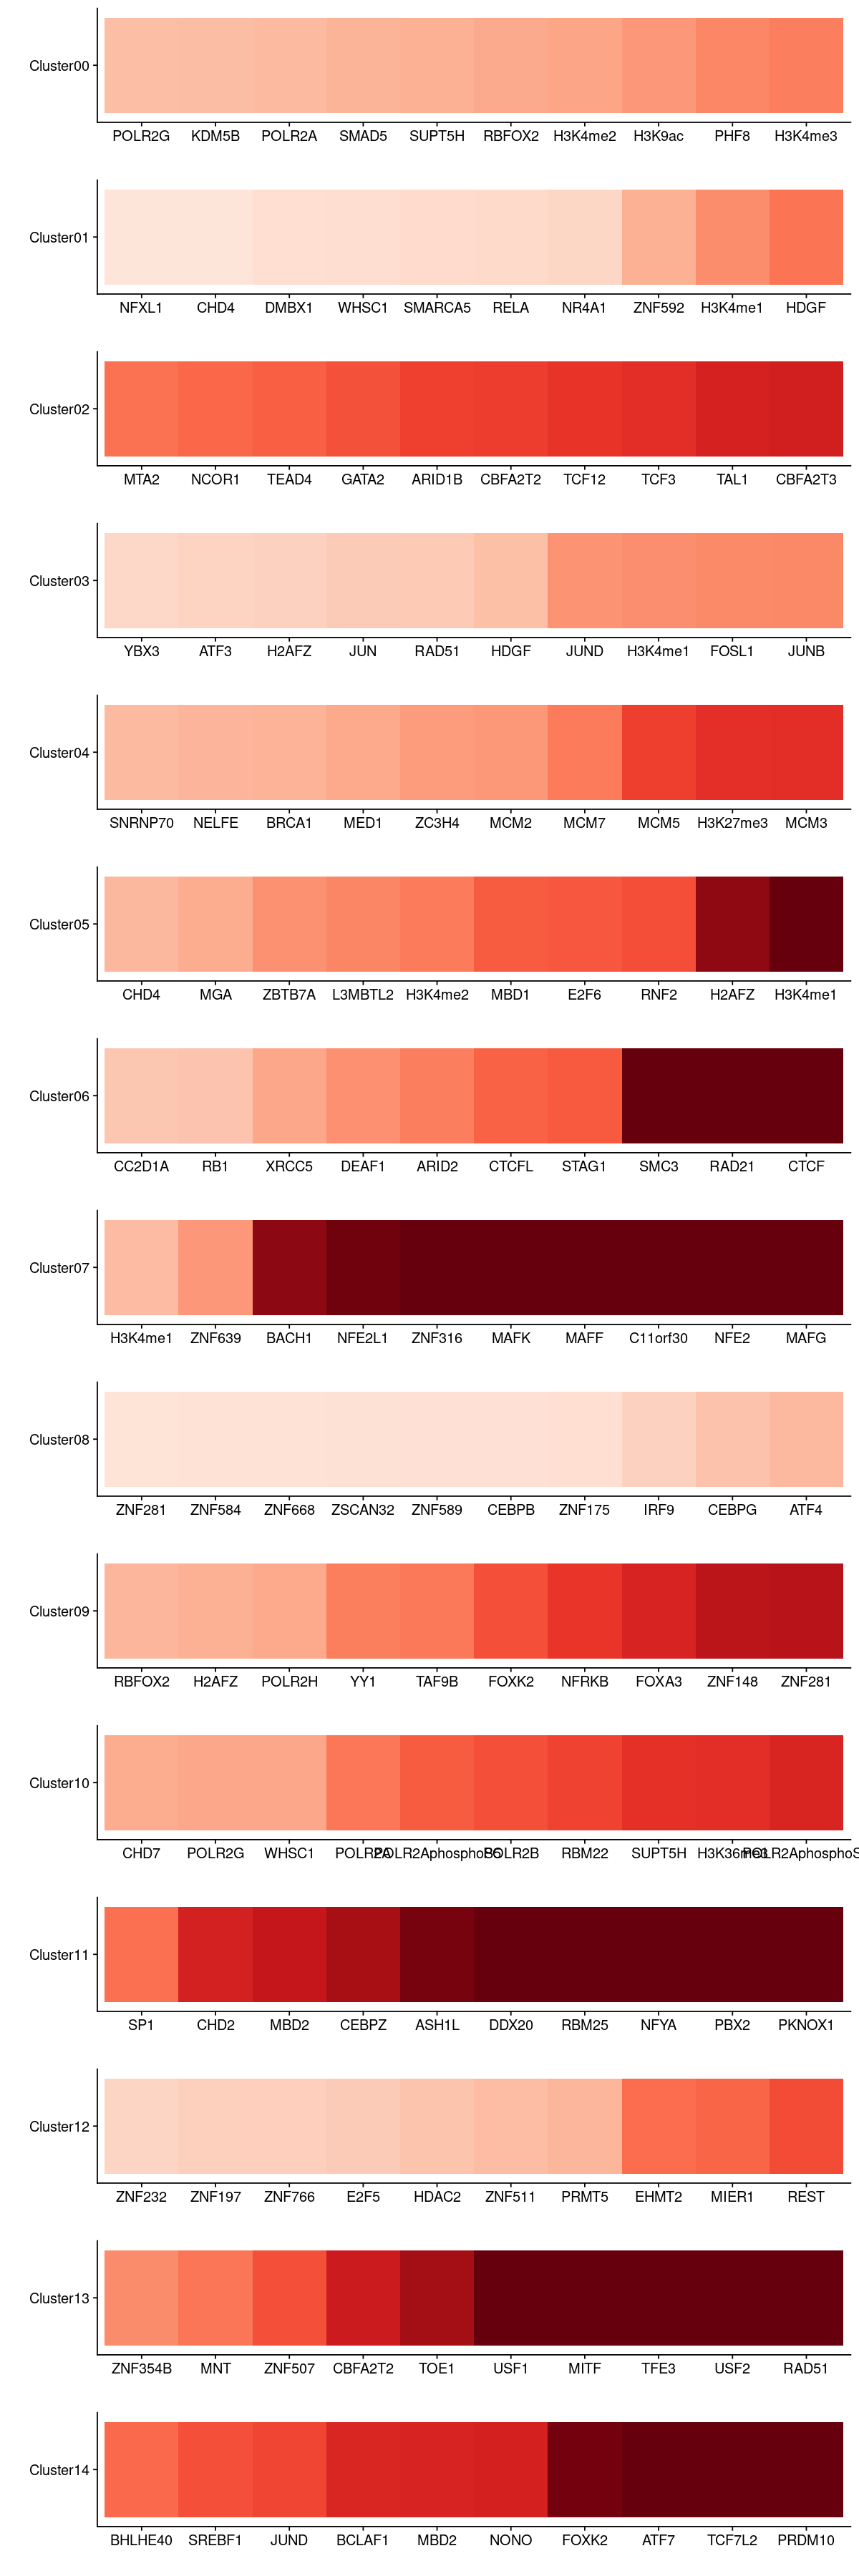

In [27]:
dat = dat_fit_summary_upper
lst = split(dat, dat$Group)
lst = lapply(lst, function(dat){
    ###
    dat = dat %>% 
        dplyr::arrange(Score) %>% 
        dplyr::mutate(Feature = factor(Feature, levels=Feature))

    ###
    gpt = ggplot(dat, aes(x=Feature, y=Group, fill=Score)) +
        geom_tile() +
        theme_cowplot() +
        labs(x="", y="") +
        scale_fill_gradientn(
            colours = vec_txt_colors,
            values  = vec_num_values, # Rescaled between 0 and 1
            limits  = c(1.5, 5),  # Explicit limits
            oob     = scales::squish, # Clamp out-of-range values to closest limit color
            name    = "Score"
        )
    return(gpt)
})

lst = lapply(lst, function(gpt){
    gpt = gpt + theme(legend.position="none")
})

options(repr.plot.height=30, repr.plot.width=10)
plot_grid(plotlist = lst, ncol=1)

In [55]:
dat = dat_fit_summary
dat = dat %>% dplyr::filter(Group == "Cluster12") %>% dplyr::arrange(-Score)
head(dat, 30)

Group,Feature,Stat,Pval,Score,Padj,nLog10Padj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cluster12,REST,20.17168,0,3.530244,0,5
Cluster12,MIER1,19.09256,0,3.295112,0,5
Cluster12,EHMT2,18.70356,0,3.210352,0,5
Cluster12,PRMT5,15.10259,0,2.425727,0,5
Cluster12,ZNF511,14.69821,0,2.337615,0,5
Cluster12,HDAC2,14.35753,0,2.263382,0,5
Cluster12,E2F5,13.95685,0,2.176078,0,5
Cluster12,ZNF766,13.74117,0,2.129081,0,5
Cluster12,ZNF197,13.69131,0,2.118218,0,5


In [57]:
dat = dat_fit_summary
dat = dat %>% dplyr::filter(Group == "Cluster05") %>% dplyr::arrange(-Score)
vec = dat$Feature 
vec = head(vec, 20)
for (txt in vec){cat(txt, "\n")}

H3K4me1 
H2AFZ 
RNF2 
E2F6 
MBD1 
H3K4me2 
L3MBTL2 
ZBTB7A 
MGA 
CHD4 
EZH2 
CTCFL 
SMARCA4 
VEZF1 
CTCF 
CBX5 
CBX2 
BMI1 
BCOR 
KDM2B 


In [30]:
dat = dat_fit_summary
vec = unique(dat$Feature)
idx = str_detect(vec, "MIER")
vec[idx]

[1] "MIER1"

In [34]:
dat = dat_fit_summary
dat = dat %>% dplyr::filter(str_detect(Feature, "GATA1")) %>% dplyr::filter(Score > 0, Stat > 0)
dat

Group,Feature,Stat,Pval,Score,Padj,nLog10Padj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cluster02,GATA1,39.715711,0.0000,2.7449099,0.00000000,5.000000
Cluster05,GATA1,2.642088,0.0106,1.2343488,0.02330211,1.632605
Cluster08,GATA1,8.714840,0.0000,0.3682689,0.00000000,5.000000


In [32]:
dat = dat_fit_summary_subset
dat = dat %>% dplyr::filter(str_detect(Feature, "EP400"))
dat

Group,Feature,Stat,Pval,Score,Padj,nLog10Padj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cluster12,EP400,-7.453315,0,-2.489043,0,5


In [285]:
dat = dat_fit_summary
vec = c("H3K4me3", "H3K27me3")
dat = dat %>% dplyr::filter(Feature %in% vec) %>% dplyr::filter(Score > 0)
dat

Group,Feature,Stat,Pval,Score,Padj,nLog10Padj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cluster00,H3K4me3,54.4540533,0.0000,3.02999015,0.000000000,5.0000000
Cluster02,H3K27me3,6.1035153,0.0000,0.20650094,0.000000000,5.0000000
Cluster03,H3K27me3,0.4677958,0.6476,0.56624852,0.707336688,0.1503738
Cluster04,H3K27me3,15.0732336,0.0000,3.82862658,0.000000000,5.0000000
Cluster05,H3K27me3,3.2670180,0.0012,1.43418959,0.003572571,2.4470191
Cluster05,H3K4me3,4.4142447,0.0000,1.80105064,0.000000000,5.0000000
Cluster06,H3K27me3,7.5259626,0.0000,1.28640591,0.000000000,5.0000000
Cluster09,H3K4me3,0.7034362,0.4760,2.12518939,0.485315068,0.3139762
Cluster11,H3K27me3,-2.1087299,0.0351,0.45489672,0.041094607,1.3862152


## Plot only REST and CTCF

In [206]:
dat = dat_fit_summary_lower
lst = split(dat, dat$Group)
lst[[3]]

Group,Feature,Stat,Pval,Score,Padj,nLog10Padj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cluster02,PHF8,-23.57015,0,-2.034468,0,5
Cluster02,H2AFZ,-22.89903,0,-1.983785,0,5
Cluster02,POLR2G,-22.73594,0,-1.971468,0,5
Cluster02,RBFOX2,-21.28898,0,-1.862193,0,5
Cluster02,POLR2H,-21.17311,0,-1.853443,0,5
Cluster02,H3K4me3,-21.14016,0,-1.850955,0,5
Cluster02,SUPT5H,-20.16583,0,-1.777373,0,5
Cluster02,POLR2B,-20.13898,0,-1.775345,0,5
Cluster02,SMAD5,-19.28096,0,-1.710547,0,5


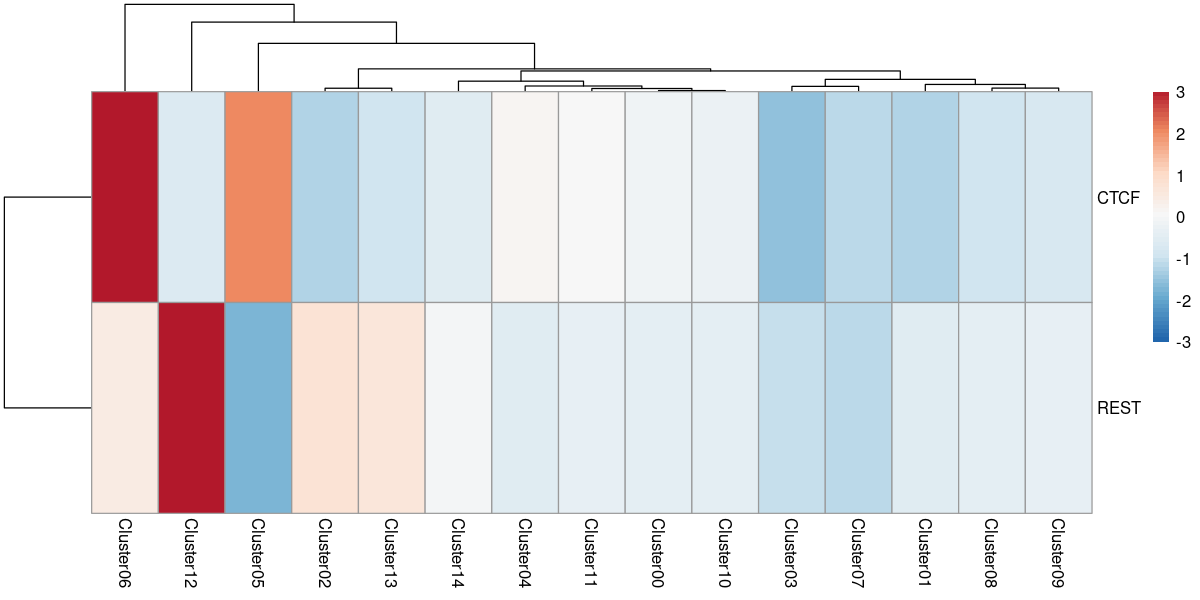

In [108]:
vec_num_breaks = seq(-3, 3, by = 0.1)

vec = brewer.pal(n = 7, name = "RdBu")
vec = colorRampPalette(rev(vec))(length(vec_num_breaks))
vec_txt_colors = vec

options(repr.plot.height = 5, repr.plot.width=10)
pheatmap(
    t(dat),
    color  = vec_txt_colors,
    breaks = vec_num_breaks,
    #cluster_rows = FALSE,
    #cluster_cols = FALSE
)

In [71]:
dat = dat_fit_summary
dat = dat %>% 
    dplyr::select(Group, Feature, Score) %>%
    tidyr::spread(Feature, Score) %>%
    column_to_rownames("Group")

head(dat)

,ADNP,AFF1,AFF4,AGO1,ARHGAP35,ARID1B,ARID2,ARID3A,ARID3B,ARID4B,⋯,ZNF778,ZNF780A,ZNF785,ZNF79,ZNF83,ZNF830,ZNF84,ZSCAN29,ZSCAN32,ZZZ3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cluster00,-0.9768015,0.4857055,1.2770996,0.5531235,0.05695945,-2.3563861,0.49334316,-1.47081009,-0.13946761,1.7641394,⋯,-0.2179722,0.1080013,-0.48519072,-0.4039663,-0.7803523,0.4719939,0.8465770,0.4083387,0.3688826,0.98703604
Cluster01,0.4968631,-0.1582823,-1.0818699,-2.3311818,0.18398912,0.2350918,0.48471579,0.52838299,1.18993092,-1.1205029,⋯,0.5284207,0.3254563,1.03787070,1.3089110,0.5894340,0.2664243,0.4109430,-0.4420691,0.5313591,-0.76637091
Cluster02,0.7382069,-0.3460658,-0.4576709,-1.3290437,0.50889480,3.6470484,-0.43671634,0.90327301,-0.21785464,-0.7574828,⋯,-0.4786070,-0.7663914,-0.05443931,-0.4276203,0.5017584,-1.1543758,-0.8633672,0.1270029,-0.8408490,-0.82696927
Cluster03,-0.2301033,-0.1087180,-1.4262521,-0.8727772,1.34575365,-0.7215074,0.45505620,-0.45078138,-0.31057040,-1.7823026,⋯,-0.6341046,0.6052590,-0.30971980,-1.6491578,-1.3770186,0.6884237,-1.0492935,-0.1764221,-1.2769295,0.03407042
Cluster04,-0.4162951,-1.0407797,-0.5170661,0.7368797,0.89714887,-1.3712135,-0.02060912,-0.81507224,0.08394511,-0.7336812,⋯,0.8137411,0.4779022,0.69484450,-0.6887507,-1.1024028,-0.3301091,-0.1165248,-0.2473920,-0.8021788,-0.67012020
Cluster05,0.8836253,-0.9663621,-1.1366185,0.3994229,1.39516632,-0.1519454,1.07373833,0.04977018,-0.24357322,-1.8314698,⋯,0.4913081,0.7302305,-0.17971551,-0.4812609,-0.4066400,1.1702664,-0.8588779,1.0559626,-0.4306332,0.03722840


In [73]:
dat = dat_fit_summary
dat = dat %>% 
    dplyr::select(Group, Feature, Score) %>%
    tidyr::spread(Feature, Score) %>%
    column_to_rownames("Group")
dat = t(dat)
cor(dat, method = "spearman")

,Cluster00,Cluster01,Cluster02,Cluster03,Cluster04,Cluster05,Cluster06,Cluster07,Cluster08,Cluster09,Cluster10,Cluster11,Cluster12,Cluster13,Cluster14
Cluster00,1.00000000,-0.54611829,-0.63429065,0.075991725,0.115359838,-0.22231740,0.22561701,-0.22300692,-0.123650363,0.06928261,0.26351173,0.36806565,0.04775783,0.439125687,0.574761010
Cluster01,-0.54611829,1.00000000,0.27946520,-0.175446541,-0.416780964,0.07640131,-0.21945512,0.51135034,0.541010707,0.12811366,-0.20283529,-0.46197121,-0.01451758,-0.057578010,-0.348211204
Cluster02,-0.63429065,0.27946520,1.00000000,-0.071054610,-0.170088214,0.19256106,-0.13684389,0.11033091,-0.105858878,-0.09733976,-0.20792803,-0.44060366,0.11103036,-0.435283691,-0.454740000
Cluster03,0.07599173,-0.17544654,-0.07105461,1.000000000,0.428689387,0.31773251,0.39869037,0.13513630,-0.406387261,-0.11427592,0.09662419,0.29519551,-0.02901107,-0.043627673,-0.006900031
Cluster04,0.11535984,-0.41678096,-0.17008821,0.428689387,1.000000000,0.13721088,0.60236003,-0.33931678,-0.626048153,-0.28456812,0.54696861,0.20946405,-0.00944572,-0.006998715,0.074742088
Cluster05,-0.22231740,0.07640131,0.19256106,0.317732511,0.137210883,1.00000000,0.28613545,0.24493433,-0.264265483,0.05521722,-0.04652279,-0.04926203,-0.11148899,-0.214622292,-0.300828509
Cluster06,0.22561701,-0.21945512,-0.13684389,0.398690371,0.602360030,0.28613545,1.00000000,-0.15715357,-0.376847218,-0.30154501,0.43788386,0.12030739,0.23120750,0.051819768,0.176586378
Cluster07,-0.22300692,0.51135034,0.11033091,0.135136300,-0.339316777,0.24493433,-0.15715357,1.00000000,0.252970466,0.23706400,-0.40364853,-0.18698611,-0.05547229,-0.084301681,-0.190453304
Cluster08,-0.12365036,0.54101071,-0.10585888,-0.406387261,-0.626048153,-0.26426548,-0.37684722,0.25297047,1.000000000,0.10780644,-0.38405170,-0.15944402,0.04373858,0.144736454,-0.003114038
Cluster09,0.06928261,0.12811366,-0.09733976,-0.114275920,-0.284568121,0.05521722,-0.30154501,0.23706400,0.107806436,1.00000000,-0.12677620,-0.02468982,-0.18265145,0.171821092,-0.071498818


In [82]:
vec = brewer.pal(n=8, name="Reds")
vec

[1] "#FFF5F0" "#FEE0D2" "#FCBBA1" "#FC9272" "#FB6A4A" "#EF3B2C" "#CB181D"
[8] "#99000D"

In [83]:
vec = brewer.pal(n=8, name="Blues")
vec

[1] "#F7FBFF" "#DEEBF7" "#C6DBEF" "#9ECAE1" "#6BAED6" "#4292C6" "#2171B5"
[8] "#084594"

In [88]:
vec1 = brewer.pal(n=6, name="Reds")
vec2 = brewer.pal(n=6, name="Blues")
vec  = c(rev(vec1), "#FFFFFF", vec2)
vec  = colorRampPalette(vec)(20)
vec  = rev(vec)
vec_txt_color = vec

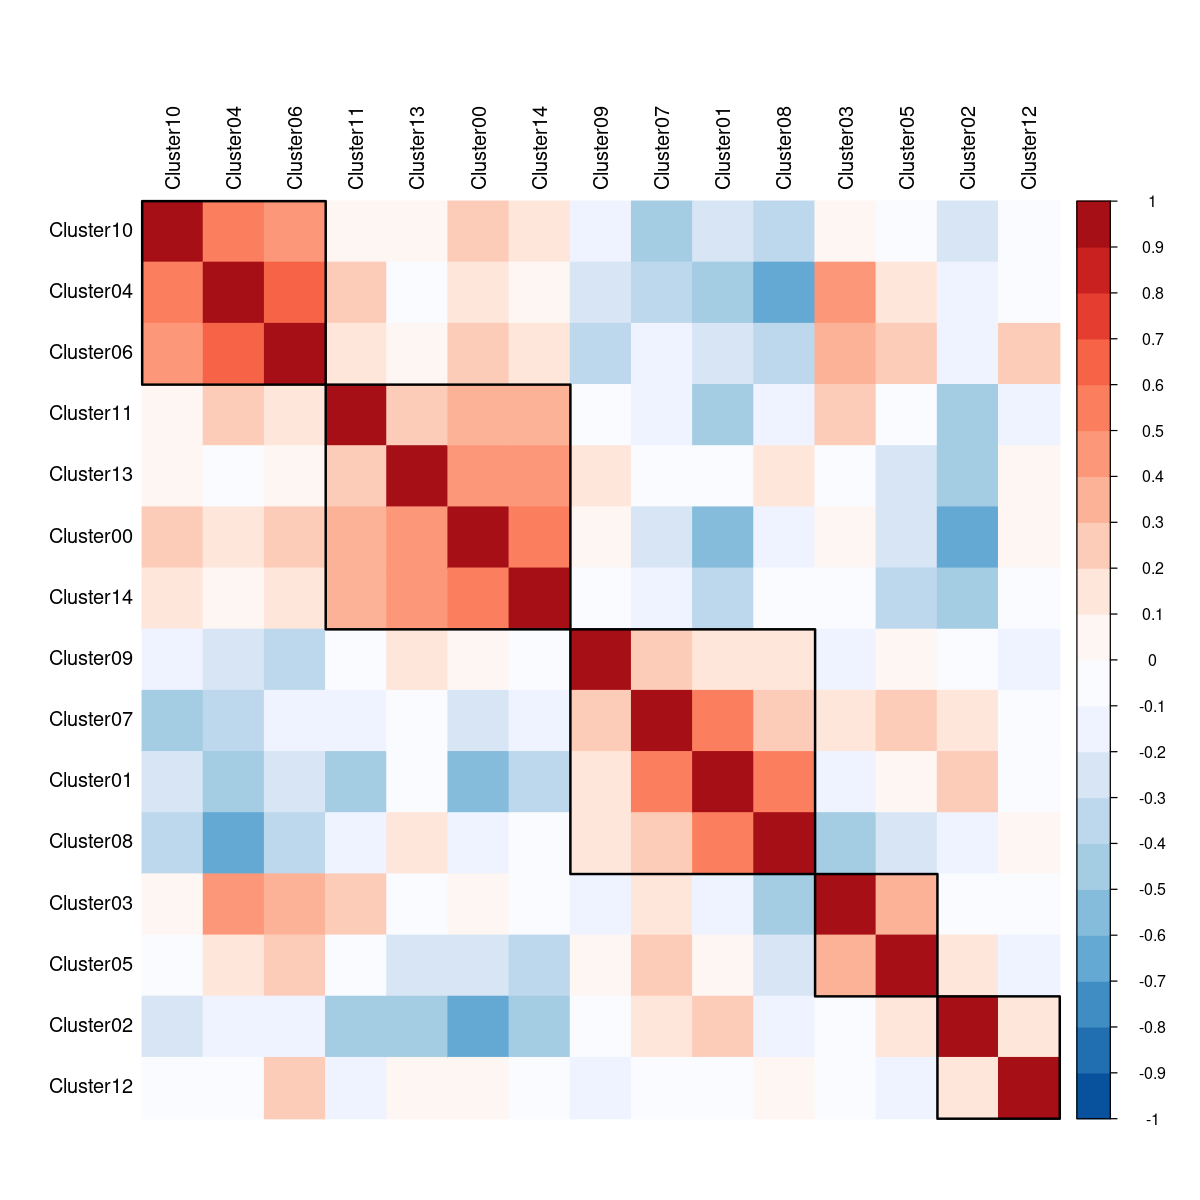

In [121]:
dat = dat_fit_summary
dat = dat %>% 
    dplyr::select(Group, Feature, Score) %>%
    tidyr::spread(Feature, Score) %>%
    column_to_rownames("Group")
dat = t(dat)
dat = cor(dat, method = "spearman")

# correlogram with hclust reordering
options(repr.plot.height = 10, repr.plot.width=10)
corrplot(
    dat, 
    method="color", 
    col=vec_txt_color, 
    tl.col="black",
    order="hclust", 
    addrect = 5,
) 

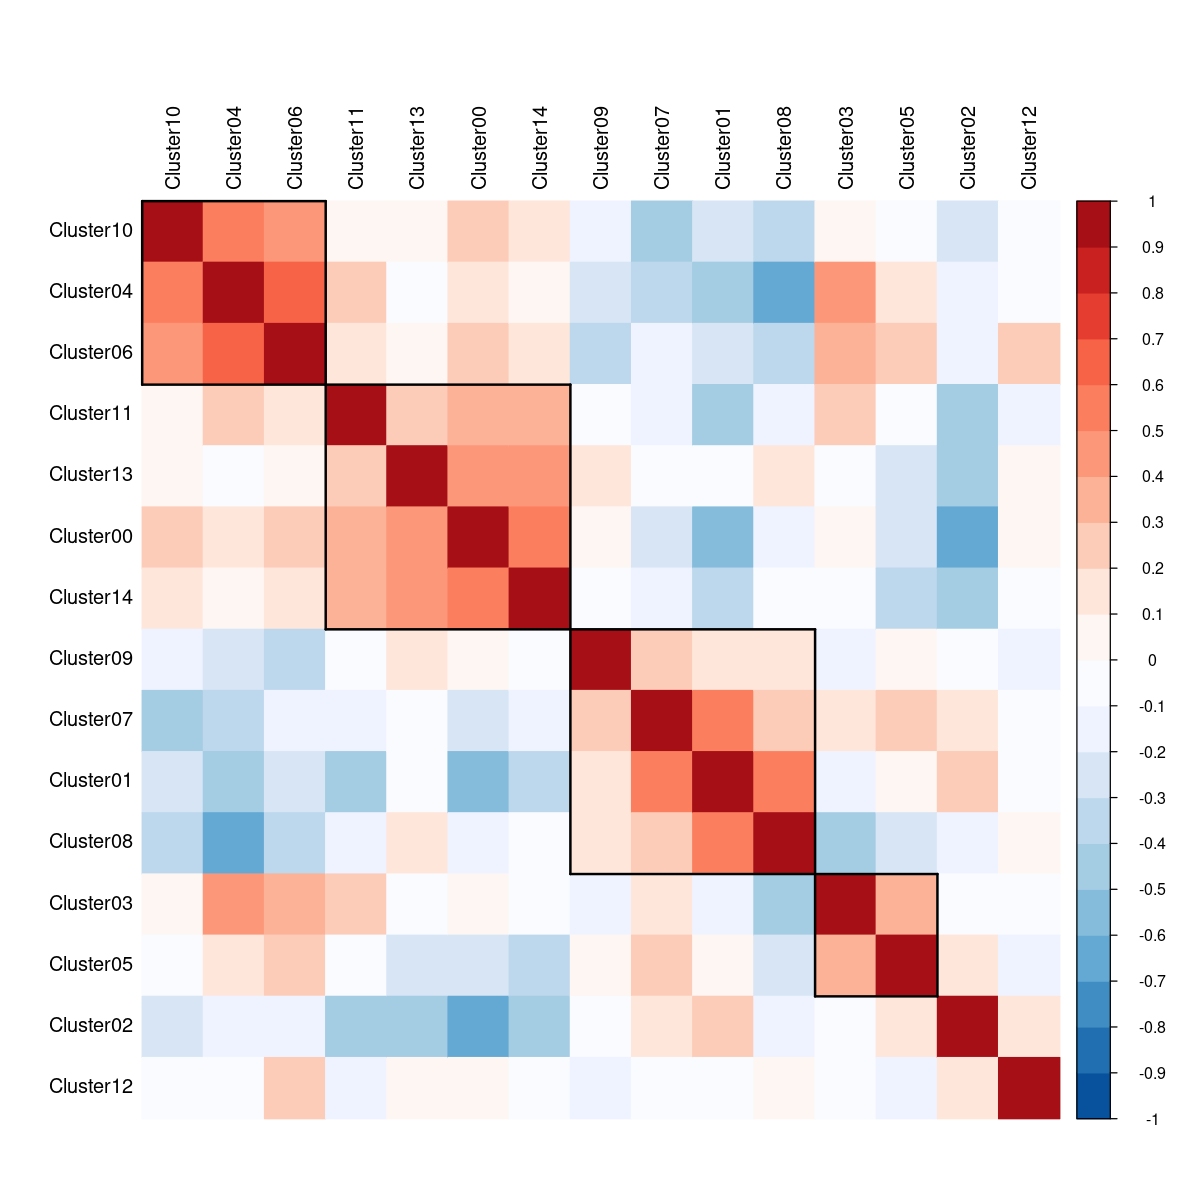

In [129]:
options(repr.plot.height = 10, repr.plot.width=10)
corrplot(
    dat, 
    method="color", 
    col=vec_txt_color, 
    tl.col="black",
    order="hclust", 
) %>%
corrRect(index = c(1, 4, 8, 12, 13))

In [131]:
dat = dat_fit_summary
head(dat)

Group,Feature,Stat,Pval,Score,Padj,nLog10Padj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cluster00,H2AFZ,33.107126,0,1.634034354,0,5
Cluster00,H3K27ac,28.396013,0,1.325956991,0,5
Cluster00,H3K27me3,-10.903122,0,-1.243961051,0,5
Cluster00,H3K36me3,7.978978,0,-0.009189633,0,5
Cluster00,H3K4me1,-32.965805,0,-2.686722826,0,5
Cluster00,H3K4me2,48.054838,0,2.611521419,0,5


In [130]:
dat = dat_fit_summary
dat = dat %>% 
    dplyr::select(Group, Feature, Score) %>%
    tidyr::spread(Feature, Score) %>%
    column_to_rownames("Group")

head(dat)

,ADNP,AFF1,AFF4,AGO1,ARHGAP35,ARID1B,ARID2,ARID3A,ARID3B,ARID4B,⋯,ZNF778,ZNF780A,ZNF785,ZNF79,ZNF83,ZNF830,ZNF84,ZSCAN29,ZSCAN32,ZZZ3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cluster00,-0.9768015,0.4857055,1.2770996,0.5531235,0.05695945,-2.3563861,0.49334316,-1.47081009,-0.13946761,1.7641394,⋯,-0.2179722,0.1080013,-0.48519072,-0.4039663,-0.7803523,0.4719939,0.8465770,0.4083387,0.3688826,0.98703604
Cluster01,0.4968631,-0.1582823,-1.0818699,-2.3311818,0.18398912,0.2350918,0.48471579,0.52838299,1.18993092,-1.1205029,⋯,0.5284207,0.3254563,1.03787070,1.3089110,0.5894340,0.2664243,0.4109430,-0.4420691,0.5313591,-0.76637091
Cluster02,0.7382069,-0.3460658,-0.4576709,-1.3290437,0.50889480,3.6470484,-0.43671634,0.90327301,-0.21785464,-0.7574828,⋯,-0.4786070,-0.7663914,-0.05443931,-0.4276203,0.5017584,-1.1543758,-0.8633672,0.1270029,-0.8408490,-0.82696927
Cluster03,-0.2301033,-0.1087180,-1.4262521,-0.8727772,1.34575365,-0.7215074,0.45505620,-0.45078138,-0.31057040,-1.7823026,⋯,-0.6341046,0.6052590,-0.30971980,-1.6491578,-1.3770186,0.6884237,-1.0492935,-0.1764221,-1.2769295,0.03407042
Cluster04,-0.4162951,-1.0407797,-0.5170661,0.7368797,0.89714887,-1.3712135,-0.02060912,-0.81507224,0.08394511,-0.7336812,⋯,0.8137411,0.4779022,0.69484450,-0.6887507,-1.1024028,-0.3301091,-0.1165248,-0.2473920,-0.8021788,-0.67012020
Cluster05,0.8836253,-0.9663621,-1.1366185,0.3994229,1.39516632,-0.1519454,1.07373833,0.04977018,-0.24357322,-1.8314698,⋯,0.4913081,0.7302305,-0.17971551,-0.4812609,-0.4066400,1.1702664,-0.8588779,1.0559626,-0.4306332,0.03722840
